# Basics > Correlation

> How correlated are the variables in the data?

Create a correlation matrix of selected numeric variables (`int` or `float`). Correlations and p.values are provided for each variable pair. 

In [1]:
import matplotlib as mpl
import pandas as pd
import pyrsm as rsm

# increase plot resolution
mpl.rcParams["figure.dpi"] = 150

In [2]:
rsm.load_data(pkg="basics", name="salary", dct=globals())

In [3]:
rsm.describe(salary)

## Salaries for Professors

### Description

The 2008-09 nine-month academic salary for Assistant Professors, Associate Professors and Professors in a college in the U.S. The data were collected as part of the on-going effort of the college's administration to monitor salary differences between male and female faculty members. A data frame with 397 observations on the following 6 variables.

### Variables

- rank = a factor with levels AsstProf, AssocProf, and Prof
- discipline = a factor with levels A ('theoretical' departments) or B ('applied' departments)
- yrs.since.phd = years since PhD
- yrs.service = years of service
- sex = a factor with levels Female and Male
- salary = nine-month salary, in dollars

### Source

Fox J. and Weisberg, S. (2011) An R Companion to Applied Regression, Second Edition Sage.


In [4]:
salary

,salary,rank,discipline,yrs.since.phd,yrs.service,sex
0,139750,Prof,B,19,18,Male
1,173200,Prof,B,20,16,Male
2,79750,AsstProf,B,4,3,Male
3,115000,Prof,B,45,39,Male
4,141500,Prof,B,40,41,Male
...,...,...,...,...,...,...
392,103106,Prof,A,33,30,Male
393,150564,Prof,A,31,19,Male
394,101738,Prof,A,42,25,Male
395,95329,Prof,A,25,15,Male


To create a correlation object use `rsm.correlation`. The created object has attributes and methods that you can use to get the information you need. For example. the `.cr` attribute shows the correlation matrix as a two dimension numpy array.

In [5]:
cr = rsm.correlation(salary[["salary", "yrs.since.phd", "yrs.service"]])
cr.cr

array([[0.        , 0.        , 0.        ],
       [0.41923111, 0.        , 0.        ],
       [0.33474468, 0.90964915, 0.        ]])

Documentation about how to create a correlation object and how to acces its attrubutes is shown below.

In [6]:
help(cr)

Help on correlation in module pyrsm.basics object:

class correlation(builtins.object)
 |  correlation(df)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, df)
 |      Calculate correlations between numeric variables in a Pandas dataframe
 |      
 |      Parameters
 |      ----------
 |      df : Pandas dataframe with numeric variables
 |      
 |      Returns
 |      -------
 |      Correlation object with two key attributes
 |      cr: Correlation matrix
 |      cp: p.value matrix
 |      
 |      Examples
 |      --------
 |      import pandas as pd
 |      import pyrsm as rsm
 |      rsm.load_data(pkg="basics", name="salary", dct=globals())
 |      cr = rsm.correlation(salary[["salary", "yrs.since.phd", "yrs.service"]])
 |      c.cr
 |  
 |  plot(self, nobs=1000, dec=2, figsize=None)
 |      Plot of correlations between numeric variables in a Pandas dataframe
 |      
 |      Parameters
 |      ----------
 |      nobs : int
 |          Number of observations to use for the s

Correlation objects have two methods: `summary` and `plot`. The documentation for each is shown below.

In [14]:
help(cr.summary)

Help on method summary in module pyrsm.basics:

summary(cutoff=0, dec=2) method of pyrsm.basics.correlation instance
    Print correlations between numeric variables in a Pandas dataframe
    
    Parameters
    ----------
    cutoff : float
        Only show correlations larger than a threshold in absolute value
    dec : int
        Number of decimal places to use in rounding
    
    Examples
    --------
    import pandas as pd
    import pyrsm as rsm
    rsm.load_data(pkg="basics", name="salary", dct=globals())
    cr = rsm.correlation(salary[["salary", "yrs.since.phd", "yrs.service"]])
    cr.summary()



In [8]:
cr.summary()

Correlation
Variables: salary, yrs.since.phd, yrs.service
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated

Correlation matrix:
              salary yrs.since.phd
yrs.since.phd   0.42              
yrs.service     0.33          0.91

p.values:
              salary yrs.since.phd
yrs.since.phd    0.0              
yrs.service      0.0           0.0


We can use the `plot` method to get a visual representation of the correlation matrix. Note that scatter plots in the graph at most 1,000 data points by default. To generate scatter plots that use all observations use `plot(n = -1)`.

Stars shown in the plot are interpreted as:

- p.value between 0 and 0.001:  ***
- p.value between 0.001 and 0.01: **
- p.value between 0.01 and 0.05: *
- p.value between 0.05 and 0.1: .

In [9]:
help(cr.plot)

Help on method plot in module pyrsm.basics:

plot(nobs=1000, dec=2, figsize=None) method of pyrsm.basics.correlation instance
    Plot of correlations between numeric variables in a Pandas dataframe
    
    Parameters
    ----------
    nobs : int
        Number of observations to use for the scatter plots. The default
        value is 1,000. To use all observations in the plots, use nobs=-1
    dec : int
        Number of decimal places to use in rounding
    figsize : tuple
        A tuple that determines the figure size. If None, size is
        determined based on the number of numeric variables in the
        data
    
    Examples
    --------
    import pandas as pd
    import pyrsm as rsm
    rsm.load_data(pkg="basics", name="salary", dct=globals())
    cr = rsm.correlation(salary[["salary", "yrs.since.phd", "yrs.service"]])
    cr.plot(figsize=(7, 3))



In the graph below all observations all observations are use to calculate the correlations but only 50 randomly sampled observations are used to generate the scatter plots. The `salary` dataset has only 397 observations so this option isn't really needed. However, for datasets with many thousands of rows, scatter plots are very slow to generate. The default value for `nobs` is set to 1,000.

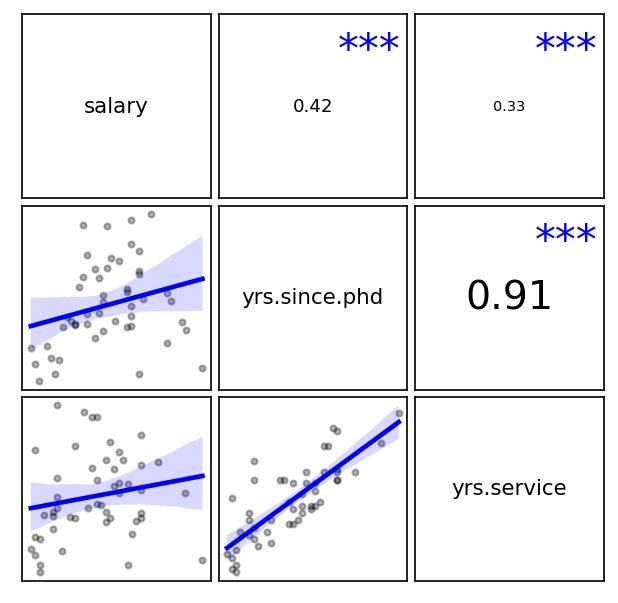

In [10]:
cr.plot(nobs=50)

When the number of observations in a dataset is more than 1,000 and you want to use all observations to calculate the correlations and generate the scatter plots use `nobs = -1`.

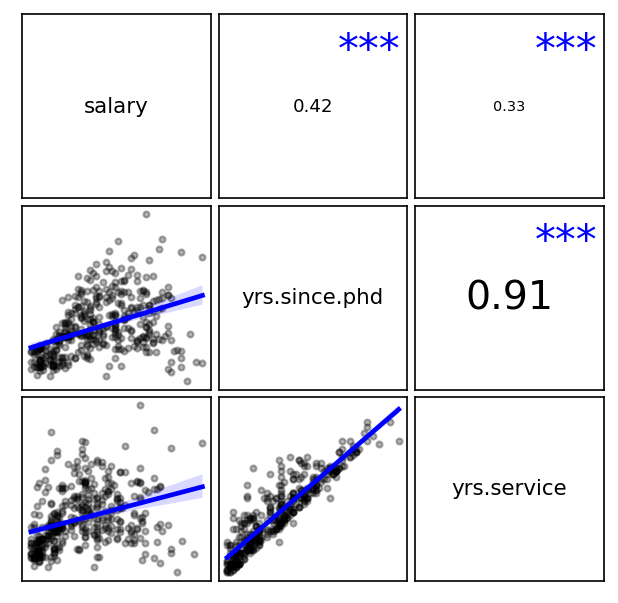

In [11]:
cr.plot(nobs=-1)

The font-size used in the plot is proportional to the size and significance of the correlation between two variables.

### Correlation cutoff

To show only correlations above a certain value choose a non-zero value in the numeric input between 0 and 1 (e.g., 0.15).

In [12]:
cr.summary(cutoff=0.5)

Correlation
Variables: salary, yrs.since.phd, yrs.service
Null hyp.: variables x and y are not correlated
Alt. hyp.: variables x and y are correlated

Correlation matrix:
              salary yrs.since.phd
yrs.since.phd                     
yrs.service                   0.91

p.values:
              salary yrs.since.phd
yrs.since.phd                     
yrs.service                    0.0


### Khan on correlation

In [13]:
%%HTML

<p align="center"><iframe width="640" height="375" src="https://www.youtube.com/embed/-Y-M9aD_ccQ" frameborder="0" allowfullscreen></iframe></p>